<a href="https://colab.research.google.com/github/mehulgajinkar/Machine-Learning/blob/main/ProfitabilityUsingMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.svm import SVC

Misc

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

# **DATA PREPARATION**

In [ ]:
df = pd.read_csv('listed.csv', low_memory=False)

In [ ]:
df

,cname,year,Industry_Group,V2,V3,V4,V5,V6,V7,V8,...,V105,V106,V107,V108,V109,V110,V111,V124,hleverage,profitability
0,20 Microns Ltd.,2001,Minerals,442.2,1.1,1.7,-2.3,422.1,22.7,95.0,...,405.6,332.9,1.3,24.0,288.9,NaN,NaN,24.0,0.0,1.0
1,360 One Wam Ltd.,2001,Other fund based financial services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3I Infotech Ltd.,2001,Computer software,423.2,668.6,8.1,NaN,826.6,279.3,530.0,...,896.6,815.4,2036.4,198.6,253.9,NaN,NaN,NaN,1.0,1.0
3,3M India Ltd.,2001,"Plastic furniture, floorings & miscellaneous i...",2082.7,4.6,NaN,54.4,2041.9,107.5,305.1,...,580.8,380.7,NaN,389.1,746.9,NaN,NaN,NaN,0.0,1.0
4,3P Land Holdings Ltd.,2001,Other fund based financial services,627.9,8.7,1.1,-7.6,647.7,-16.6,7.4,...,345.4,190.2,58.1,57.3,191.8,NaN,NaN,57.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45943,Zota Health Care Ltd.,2021,NaN,1072.4,8.2,0.7,21.4,1115.5,-1.6,30.4,...,298.5,139.9,1.3,32.0,681.6,0.5,0.3,20.9,0.0,0.0
45944,Zuari Agro Chemicals Ltd.,2021,NaN,1.1,69.7,52.1,-1.0,25321.6,-2371.2,-1115.9,...,1026.7,764.7,11874.5,807.5,18769.9,1241.1,NaN,3910.3,NaN,0.0
45945,Zuari Industries Ltd.,2021,NaN,7772.6,1189.4,216.2,-797.2,8104.6,694.4,2658.0,...,6117.4,5173.7,18586.2,7834.9,8601.0,1051.8,NaN,7341.6,1.0,1.0
45946,Zydus Lifesciences Ltd.,2021,NaN,77316.0,1479.0,174.0,833.0,65705.0,14762.0,22562.0,...,70035.0,41120.0,64706.0,47556.0,42062.0,1297.0,12824.0,34178.0,0.0,1.0


In [ ]:
filtered_co = ['3I Infotech Ltd.','63 Moons Technologies Ltd.','Accelya Solutions India Ltd.','Adroit Infotech Ltd.','Allied Digital Services Ltd.','Aurionpro Solutions Ltd.','Bartronics India Ltd.','Bharatiya Global Infomedia Ltd.','Birlasoft Ltd.','Brightcom Group Ltd.','C E Info Systems Ltd.','Cadsys (India) Ltd.','California Software Co. Ltd.','Cambridge Technology Enterprises Ltd.','Cigniti Technologies Ltd.','Coforge Ltd.','Compucom Software Ltd.','Cybertech Systems & Software Ltd.','Cyient Ltd.','D R C Systems India Ltd.','Datamatics Global Services Ltd.','Dev Information Technology Ltd.','Digispice Technologies Ltd.','Emudhra Ltd.','Expleo Solutions Ltd.','F C S Software Solutions Ltd.','Fidel Softech Ltd.','G I Engineering Solutions Ltd.','G S S Infotech Ltd.','Genesys International Corpn. Ltd.','Globesecure Technologies Ltd.','Goldstone Technologies Ltd.','H C L Technologies Ltd.','H O V Services Ltd.','Infibeam Avenues Ltd.','Infobeans Technologies Ltd.','Infosys Ltd.','Inspirisys Solutions Ltd.','Intellect Design Arena Ltd.','Intense Technologies Ltd.','K P I T Technologies Ltd.','Kellton Tech Solutions Ltd.','Kernex Microsystems (India) Ltd.','Ksolves India Ltd.','Ltimindtree Ltd.','Mastek Ltd.','Melstar Information Technologies Ltd.','Mindpool Technologies Ltd.','Mindteck (India) Ltd.','Mindtree Ltd. [Merged]','Mphasis Ltd.','N I I T Ltd.','Network People Services Technologies Ltd.','Newgen Software Technologies Ltd.','Nintec Systems Ltd.','Nucleus Software Exports Ltd.','Onmobile Global Ltd.','Onward Technologies Ltd.','Oracle Financial Services Software Ltd.','Persistent Systems Ltd.','Quintegra Solutions Ltd.','R S Software (India) Ltd.','R Systems International Ltd.','Ramco Systems Ltd.','Ranklin Solutions Ltd.','Rategain Travel Technologies Ltd.','Saksoft Ltd.','Sasken Technologies Ltd.','Securekloud Technologies Ltd.','Sigma Solve Ltd.','Silver Touch Technologies Ltd.','Sonata Software Ltd.','Subex Ltd.','Take Solutions Ltd.','Tanla Platforms Ltd.','Tata Consultancy Services Ltd.','Tata Elxsi Ltd.','Tech Mahindra Ltd.','Tera Software Ltd.','Tracxn Technologies Ltd.','Trigyn Technologies Ltd.','Vakrangee Ltd.','Veranda Learning Solutions Ltd.']


In [ ]:
df = df[df['cname'].isin(filtered_co)]

In [ ]:
df = df[(df['year'] >= 2010) & (df['year'] <= 2019)]

In [ ]:
df.shape

(830, 92)

In [ ]:
df_log_reg = df[['profitability','V2','V12','V16','V19','V23','V27','V28','V54','V72','V79','V92','V98','V106']]
df_lin_reg = df[['V7','V2','V12','V16','V19','V23','V27','V28','V54','V72','V79','V92','V98','V106']]

In [ ]:
df_log_reg = df_log_reg.dropna(how='all')

In [ ]:
df.shape

(830, 92)

In [ ]:
file_path = 'output.csv'
df_log_reg.to_csv(file_path, index=False)

In [ ]:
df_log_reg.isnull().sum()

,0
profitability,6
V2,21
V12,5
V16,36
V19,22
V23,2
V27,70
V28,19
V54,28
V72,46


In [ ]:
df_log_reg.fillna({'V26':0,'V27':0,'V28':0,'V54':0,'V79':0,'V86':0,'V106':0}, inplace = True)
df_lin_reg.fillna({'V26':0,'V27':0,'V28':0,'V54':0,'V79':0,'V86':0,'V106':0}, inplace = True)

In [ ]:
df_log_reg.dropna(subset=['profitability','V2','V12','V16','V19','V23','V28','V54','V72','V79','V92','V98','V106'], inplace = True)
df_lin_reg.dropna(subset=['V7','V2','V12','V16','V19','V23','V28','V54','V72','V79','V92','V98','V106'], inplace = True)

In [ ]:
df_log_reg.shape

(687, 14)

# **DATA DESCRIPTIONS**

In [ ]:
df_lin_reg

,V7,V2,V12,V16,V19,V23,V27,V28,V54,V72,V79,V92,V98,V106
19694,-996.1,5233.2,-1430.9,17.15,4.94,-32.65,0.00,0.29,33.6,29450.5,0.00,1236.1,0.0,0.0
19699,3443.7,3325.2,3439.5,18.17,14.76,489.93,0.00,4.63,33.1,27199.2,0.00,3412.9,0.0,0.0
19742,194.5,1267.3,311.6,18.74,18.07,60.15,0.00,2.48,54.1,1470.1,0.00,192.7,0.0,0.0
19795,966.4,4699.2,1103.9,20.36,18.27,198.97,0.00,4.48,15.5,7490.3,0.00,970.9,0.0,0.0
19893,36.0,532.0,96.4,1.60,1.31,13.98,0.00,1.15,0.0,2845.7,0.00,34.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41343,43797.0,272575.0,50426.0,21.72,21.58,4917.00,1.85,0.00,102937.0,36338.0,0.27,54417.0,77020.0,26714.0
41352,36.8,1783.7,57.6,2.56,1.74,125.10,1.50,0.49,153.8,36.0,5.94,156.6,513.8,317.0
41384,-216.6,328.6,-208.6,-65.60,-64.22,8.30,14.70,0.03,5.3,-157.5,-0.67,-223.6,316.4,11.3
41394,39.8,1288.8,52.2,7.49,7.23,307.80,3.54,0.07,28.8,-102.8,0.00,129.3,802.7,27.5


In [ ]:
df.describe()

,year,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V105,V106,V107,V108,V109,V110,V111,V124,hleverage,profitability
count,830.000000,7.350000e+02,686.000000,557.000000,168.000000,7.500000e+02,750.000000,750.000000,750.000000,750.000000,...,676.000000,676.000000,692.000000,748.000000,749.000000,613.000000,552.000000,603.000000,737.000000,750.000000
mean,2014.500000,2.372985e+04,1292.531050,101.394794,3.838095,1.934387e+04,5337.531600,7772.283067,6998.772533,6896.349333,...,6988.904142,3586.865089,7506.807081,3826.196390,12491.742323,657.361338,4066.719746,2804.563018,0.150611,0.810667
std,2.874013,1.050324e+05,5985.730189,390.138042,167.304581,8.389426e+04,26305.324321,36312.543270,34118.766369,33951.391362,...,25681.854621,13806.706965,31498.690470,14101.343093,51902.648620,2537.577242,10870.635636,11143.281840,0.357912,0.392035
min,2010.000000,1.000000e-01,0.100000,0.100000,-779.200000,1.000000e-01,-10577.500000,-3307.800000,-7023.800000,-10577.500000,...,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
25%,2012.000000,3.104500e+02,7.075000,0.900000,-7.800000,3.561000e+02,3.200000,48.025000,9.950000,5.225000,...,143.725000,48.800000,158.750000,86.400000,161.800000,9.200000,166.025000,52.350000,0.000000,1.000000
50%,2014.500000,1.252600e+03,47.500000,4.800000,0.350000,1.210500e+03,65.150000,259.550000,118.650000,90.200000,...,706.750000,266.750000,929.100000,337.950000,785.600000,42.400000,917.150000,201.500000,0.000000,1.000000
75%,2017.000000,4.400650e+03,239.725000,28.500000,11.600000,4.653025e+03,568.750000,1148.700000,774.300000,712.350000,...,3242.125000,1152.625000,3044.375000,1471.075000,3218.700000,219.600000,2743.000000,905.050000,0.000000,1.000000
max,2019.000000,1.231770e+06,74820.000000,4250.000000,1094.800000,1.007320e+06,300650.000000,415080.000000,396220.000000,394340.000000,...,219540.000000,112350.000000,429300.000000,112326.400000,497840.000000,33742.200000,158140.000000,118047.300000,1.000000,1.000000


In [ ]:
counts = df_log_reg['profitability'].value_counts()
print(counts)

profitability
1.0    569
0.0    118
Name: count, dtype: int64


In [ ]:
# Correlation

df_lin_reg.corr()

,V7,V2,V12,V16,V19,V23,V27,V28,V54,V72,V79,V92,V98,V106
V7,1.000000,0.991040,0.999250,0.057427,0.261148,0.390514,0.003318,-0.027178,0.424636,0.886484,-0.034507,0.997938,0.956131,0.901971
V2,0.991040,1.000000,0.993039,0.045431,0.256172,0.431423,-0.000656,-0.027668,0.481483,0.881518,-0.030216,0.992658,0.957649,0.897352
V12,0.999250,0.993039,1.000000,0.047275,0.257598,0.405764,0.002520,-0.027146,0.430325,0.885244,-0.030215,0.998683,0.956663,0.908141
V16,0.057427,0.045431,0.047275,1.000000,0.353649,-0.064115,0.006361,-0.061241,0.026956,0.045056,-0.219403,0.045820,0.041738,0.014623
V19,0.261148,0.256172,0.257598,0.353649,1.000000,0.062320,-0.153702,-0.072122,0.146212,0.250754,-0.173997,0.257834,0.217560,0.220255
V23,0.390514,0.431423,0.405764,-0.064115,0.062320,1.000000,-0.030495,0.072588,0.320293,0.324594,0.039015,0.410072,0.407606,0.502050
V27,0.003318,-0.000656,0.002520,0.006361,-0.153702,-0.030495,1.000000,-0.047495,-0.009378,-0.021709,-0.020832,0.002200,0.021487,-0.003712
V28,-0.027178,-0.027668,-0.027146,-0.061241,-0.072122,0.072588,-0.047495,1.000000,-0.024338,-0.009157,0.240180,-0.027181,-0.032913,-0.028627
V54,0.424636,0.481483,0.430325,0.026956,0.146212,0.320293,-0.009378,-0.024338,1.000000,0.367215,-0.020637,0.433013,0.461124,0.461435
V72,0.886484,0.881518,0.885244,0.045056,0.250754,0.324594,-0.021709,-0.009157,0.367215,1.000000,-0.031443,0.878434,0.811688,0.763789


In [ ]:
correlation_matrix = df_lin_reg.corr()
plt.figure(figsize=(14, 10), dpi=1000)
sns.set(style="white")  # Set a clean white background
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,            # Annotate each cell with correlation coefficients
    fmt=".2f",             # Format annotations to two decimal places
    cmap='YlGnBu',       # Choose a color map that provides good contrast
    vmin=-1, vmax=1,       # Ensure color scale goes from -1 to 1
    cbar_kws={"shrink": 0.75},  # Adjust color bar size
    square=True,           # Force the heatmap cells to be square-shaped
    annot_kws={"size": 10, "color": "black"}  # Customize annotation text
)
print(correlation_matrix)
plt.show()

            V7        V2       V12       V16       V19       V23       V27  \
V7    1.000000  0.991040  0.999250  0.057427  0.261148  0.390514  0.003318   
V2    0.991040  1.000000  0.993039  0.045431  0.256172  0.431423 -0.000656   
V12   0.999250  0.993039  1.000000  0.047275  0.257598  0.405764  0.002520   
V16   0.057427  0.045431  0.047275  1.000000  0.353649 -0.064115  0.006361   
V19   0.261148  0.256172  0.257598  0.353649  1.000000  0.062320 -0.153702   
V23   0.390514  0.431423  0.405764 -0.064115  0.062320  1.000000 -0.030495   
V27   0.003318 -0.000656  0.002520  0.006361 -0.153702 -0.030495  1.000000   
V28  -0.027178 -0.027668 -0.027146 -0.061241 -0.072122  0.072588 -0.047495   
V54   0.424636  0.481483  0.430325  0.026956  0.146212  0.320293 -0.009378   
V72   0.886484  0.881518  0.885244  0.045056  0.250754  0.324594 -0.021709   
V79  -0.034507 -0.030216 -0.030215 -0.219403 -0.173997  0.039015 -0.020832   
V92   0.997938  0.992658  0.998683  0.045820  0.257834  0.410072

# **LINEAR REGRESSION**

In [ ]:
# Train Test Split

y = df_lin_reg['V7']
X = df_lin_reg.drop(columns='V7')

In [ ]:
# 33:66 Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Model Building

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Intercept', lr.intercept_)

# Get the coefficients
coefficients = lr.coef_

# Print the coefficients along with their corresponding variable names
for var, coef in zip(X.columns, coefficients):
    print(f'{var}: {coef}')

print()
print('R2 Score', r2_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))


Intercept 5512.073260869564
V2: -2842.3945069790384
V12: 23036.50179800189
V16: 351.3233426411964
V19: 14.749484706404473
V23: -247.98448889303836
V27: 3.653671127828815
V28: 50.978936187660224
V54: 195.73892083449118
V72: 130.08488520121136
V79: -29.40784781813062
V92: 5796.493543784966
V98: 230.25059155400413
V106: -989.189511624505

R2 Score 0.9992153906649601
MSE 752144.0230830081


USING STATSMODEL LIBRARY

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     V7   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.475e+04
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:51:55   Log-Likelihood:                -5602.7
No. Observations:                 687   AIC:                         1.123e+04
Df Residuals:                     673   BIC:                         1.130e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.3721     43.794     -0.808      0.4

# **LASSO REGRESSION**

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print('Intercept', lasso.intercept_)

# Get the coefficients
coefficients = lasso.coef_

# Print the coefficients along with their corresponding variable names
for var, coef in zip(X.columns, coefficients):
    print(f'{var}: {coef}')

print()
print('R2 Score', r2_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

Intercept 5512.073260869564
const: -2988.270241350407
V2: 23854.19494100902
V12: 350.06756732120283
V16: 16.1848074798459
V19: -242.851632267456
V23: 1.972377905125669
V27: 50.03663520004334
V28: 205.9617558850272
V54: 133.61444623013918
V72: -29.899007842467277
V79: 5066.548441595471
V92: 262.9915963201001
V98: -972.3510207636122

R2 Score 0.9992458774115659
MSE 722918.7472435222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.875e+08, tolerance: 2.985e+07
  model = cd_fast.enet_coordinate_descent(


**Grid Search Optimization: Note iter = 1000000**

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(max_iter=1000000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)
print('R2 Score', r2_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

Best alpha: 100
R2 Score 0.9992458774115659
MSE 722918.7472435222


# **RIDGE REGRESSION**

In [ ]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print('Intercept', ridge.intercept_)

# Get the coefficients
coefficients = ridge.coef_

# Print the coefficients along with their corresponding variable names
for var, coef in zip(X.columns, coefficients):
    print(f'{var}: {coef}')

print()
print('R2 Score', r2_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

Intercept 5512.073260869564
const: -2806.699204700157
V2: 22887.433946841837
V12: 351.5904577487337
V16: 14.704281557609642
V19: -249.25751045890453
V23: 4.013237452048298
V27: 51.139547901974474
V28: 193.49761566264408
V54: 131.67106587425926
V72: -29.253446263724342
V79: 5915.581486331276
V92: 225.66973718097807
V98: -990.3596116070115

R2 Score 0.9992099067116783
MSE 757401.0631149794


# **ELASTIC NET**

In [ ]:
enet = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)

print('Intercept', enet.intercept_)

# Get the coefficients
coefficients = enet.coef_

# Print the coefficients along with their corresponding variable names
for var, coef in zip(X.columns, coefficients):
    print(f'{var}: {coef}')

print()
print('R2 Score', r2_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

Intercept 5512.073260869564
const: 1787.4434943107296
V2: 13997.340691455374
V12: 369.894995361101
V16: 53.90250665704121
V19: -475.72503889875355
V23: 27.796877680456394
V27: 86.58419298002795
V28: -113.47214919335968
V54: 344.9780671963917
V72: -2.279960946990726
V79: 9808.765162171094
V92: 348.7877812601668
V98: -642.2569391397986

R2 Score 0.9985774203401954
MSE 1363716.6175535242


In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ElasticNet(max_iter=1000000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)
print('R2 Score', r2_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

Best alpha: 0.1
R2 Score 0.9985774203401954
MSE 1363716.6175535242


Misc

# **LOGISTIC REGRESSION**

In [ ]:
# Train Test Split

y = df_log_reg['profitability']
X = df_log_reg.drop(columns='profitability')

In [ ]:
# 33:66 Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Model Building

logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

print('Train Score: ',logr.score(X_train,y_train))
print('Test Score : ',logr.score(X_test,y_test))

Train Score:  0.9260869565217391
Test Score :  0.920704845814978


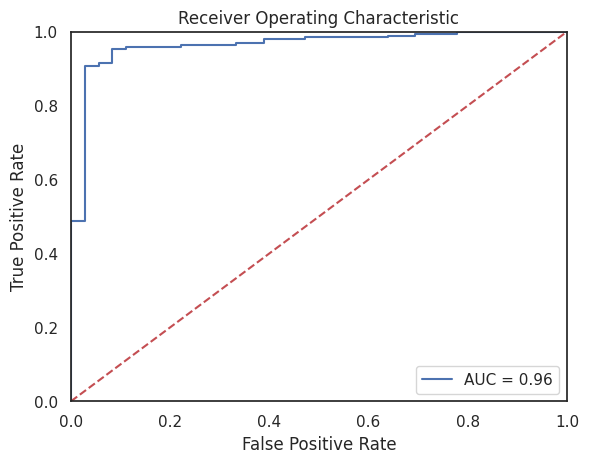

In [ ]:
# Plots

import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = logr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **SUPPORT VECTOR MACHINE**

In [ ]:
model = SVC(kernel='linear', C=1.0, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Train Score: ',model.score(X_train,y_train))
print('Test Score : ',model.score(X_test,y_test))

Train Score:  0.9239130434782609
Test Score :  0.9162995594713657


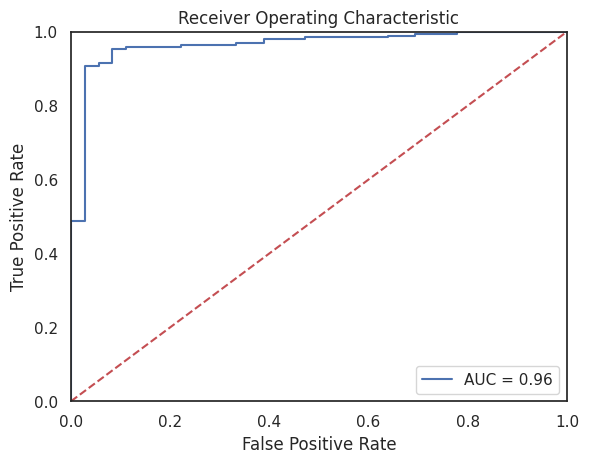

In [ ]:
# Plots

import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = logr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()